In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl

import config

In [2]:
CFG = config.Config()

In [3]:
posts: pd.DataFrame = pd.read_parquet(CFG.processed_files["posts"])
posts.head()

content  \
userId                   id                                                                            
661d1639b8beabb58229451b 66252255616a4cb7061ee32c  #UkraineKrieg: Beunruhigende Entwicklungen in ...   
                         66253e74616a4cb7061ee7cc  Bedauerlich, dass gewaltsame Konflikte weiterh...   
                         66255134616a4cb7061eeaf4  Gewalt im Nahen Osten & Ukraine nicht isoliert...   
                         6627d8efa6b56b19b4300ae4  Unterstützen wir unsere Verbündeten, respektie...   
                         6628b08fa6b56b19b4301867  Geschlossene Tür für Unsicherheit: US-Repräsen...   

                                                                 createdAt  
userId                   id                                                 
661d1639b8beabb58229451b 66252255616a4cb7061ee32c  2024-04-21 14:27:33.315  
                         66253e74616a4cb7061ee7cc  2024-04-21 16:27:32.919  
                         66255134616a4cb7061eeaf4  2024-04-21 17:47:32.762  
                         6627d8efa6b56b19b4300ae4  2024-04-23 15:51:11.067  
                         6628b08fa6b56b19b4301867  2024-04-24 07:11:11.797

In [4]:
comments: pd.DataFrame = pd.read_parquet(CFG.processed_files["comments"])
comments.head()

,,content,userId,createdAt
postId,id,,,
66226af08c2024fabb3cc44c,66261d9883ad1b524033b95f,"Gut gesagt! Vergesst nicht, dass auch wirtscha...",661d163cb8beabb58229451c,2024-04-22 08:19:36.535
662296c6616a4cb7061eaae7,66261fac83ad1b524033b9b7,"Richtig gesagt, @Gelber Roboter! Eine ausgewog...",661d1646b8beabb582294522,2024-04-22 08:28:28.538
6622a4d5616a4cb7061ead43,66261cda83ad1b524033b93b,"@Gelber Roboter, @Blaues Siegel, @Weißer Hase,...",66256b0f7adfe044bf82ae9b,2024-04-22 08:16:26.028
6622a983616a4cb7061eae17,66261f0c83ad1b524033b993,Couldn't agree more! Global connections and co...,66256b0f7adfe044bf82ae9b,2024-04-22 08:25:48.181
6622bc44616a4cb7061eb0f2,6626211283ad1b524033b9f2,"„Ganz meiner Meinung, @Lila Walross und @Blaue...",66256a827adfe044bf82ae97,2024-04-22 08:34:26.209


In [5]:
likes: pd.DataFrame = pd.read_parquet(CFG.processed_files["likes"])
likes.head()

createdAt
itemId                   userId                                           
66260b4c83ad1b524033b671 661d164ab8beabb582294524  2024-04-22 11:18:13.938
                         661d1646b8beabb582294522  2024-04-23 11:59:11.550
                         6626a9b9f62e42fb4c5c74b7  2024-04-23 14:29:04.830
                         661d1641b8beabb58229451f  2024-04-25 12:45:56.266
                         661d163fb8beabb58229451e  2024-04-28 08:31:00.852

In [6]:
dislikes: pd.DataFrame = pd.read_parquet(CFG.processed_files["dislikes"])
dislikes.head()

,,createdAt
itemId,userId,
65e9f1f965b9102926398486,65e9f1c865b910292639845d,2024-03-07 16:57:32.633
662612ff83ad1b524033b7af,66278a3cf62e42fb4c5cb401,2024-04-26 06:23:06.411
66261b7383ad1b524033b908,66278cb1f62e42fb4c5cb80a,2024-04-23 15:53:30.733
6626308783ad1b524033bc19,6627937af62e42fb4c5ccb3e,2024-04-23 11:08:02.447
662642d583ad1b524033bec3,66278cb1f62e42fb4c5cb80a,2024-04-23 15:30:57.538


In [7]:
interactions: pd.Series = (
    pd.concat([
        posts.reset_index()[["userId"]].assign(action="post"),
        comments[["userId"]].assign(action="comment"),
        likes.reset_index()[["userId"]].assign(action="like"),
        dislikes.reset_index()[["userId"]].assign(action="dislike"),
    ])
    .value_counts()
)
interactions.head()

userId                    action
661d164db8beabb582294526  like      184
661d1670b8beabb582294529  like      181
661d1641b8beabb58229451f  like      174
661d1639b8beabb58229451b  like      168
661d164bb8beabb582294525  like      168
Name: count, dtype: int64

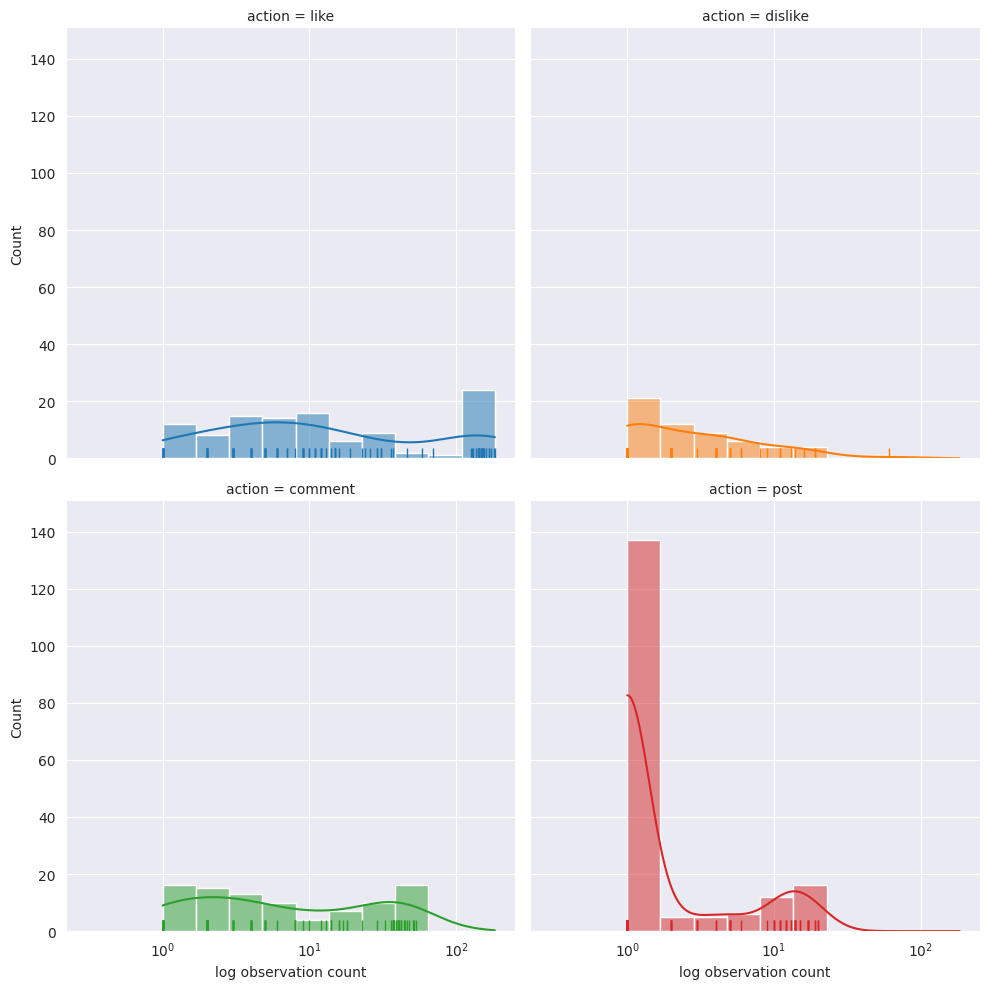

In [34]:
sns.displot(
    data=interactions.reset_index(), 
    x='count', 
    hue='action', 
    col='action', 
    col_wrap=2,
    log_scale=True,
    kde=True,
    rug=True,
    legend=None
).set(
    xlabel="log observation count"
)
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.hist.user_actions.log.pdf', format='pdf')